# Regressor1(SGD、Lasso、Ridge、ElaticNet、SVR linear)

### *全て線形が条件
### 一番基本のやり方　→　SGD
### 一部の次元が重要な場合　→　Lasso
### 全次元が重要な場合　→　Ridge
### LassoとRidgeの中間　→  ElaticNet
### 小さな誤差に対して強い回帰　→  SVR linear

### 参考 :  
SGD : http://neuro-educator.com/ml14/  
Lasso : http://neuro-educator.com/ml15/  
Ridge : http://neuro-educator.com/ml16/  
ElasticNet : http://neuro-educator.com/ml17/  
SVR linear : http://neuro-educator.com/ml18/

---

In [1]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import cross_validation, preprocessing, linear_model, svm#機械学習用のライブラリを利用
import sklearn

/Users/mitsuhiro/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


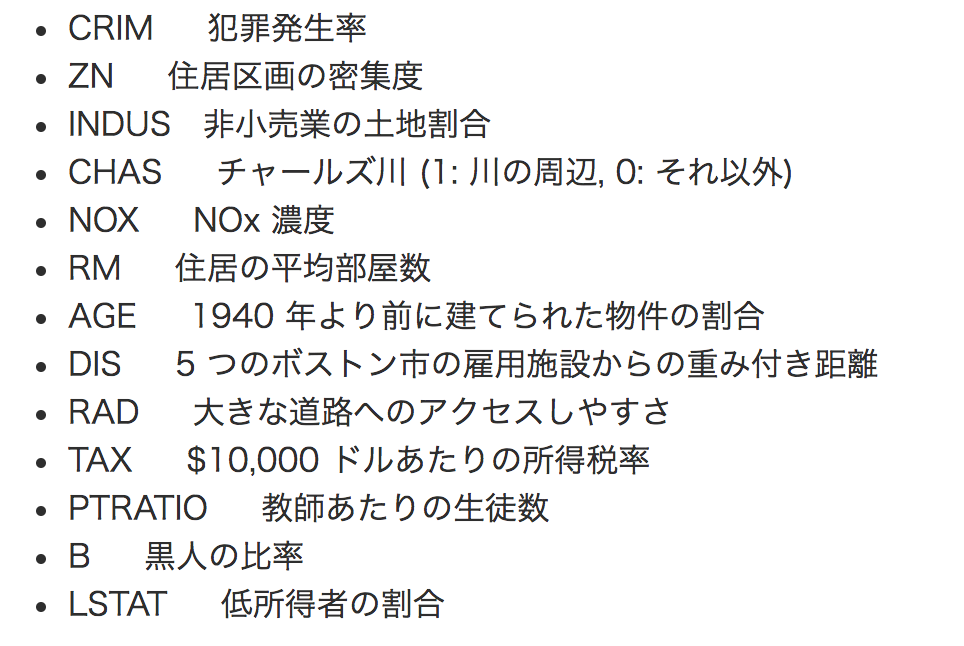

In [2]:
# 2：Housingのデータセットを読み込む--------------------------------
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns=['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
X_rm=df[['RM']].values
X=df.iloc[:, 0:13]
#X=df[['AGE']].values
Y=df['MEDV'].values
from IPython.display import Image, display_png
display_png(Image("./images/boston.png"))

In [3]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)
sc.fit(X_rm)
X_rm=sc.transform(X_rm)

In [4]:
# 4：学習データとテストデータに分割する-------------------------------
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=0)
X_rm_train, X_rm_test, Y_train, Y_test = cross_validation.train_test_split(X_rm, Y, test_size=0.2, random_state=0)

# SGD Regressor

SGDに関してはclassification1を参考

In [5]:
# 5：SGD Regressorを適用する-------------------------------------------
clf = linear_model.SGDRegressor(max_iter=1000)
clf.fit(X_train, Y_train)

clf_rm = linear_model.SGDRegressor(max_iter=1000)
clf_rm.fit(X_rm_train, Y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

詳しくはこちら
http://scikit-learn.org/stable/modules/sgd.html#regression

In [6]:
print("全部使用したときの回帰式の係数")
print(clf.intercept_) 
print(clf.coef_) 

全部使用したときの回帰式の係数
[ 22.47545074]
[-1.02859383  1.04228125  0.03457682  0.59447684 -1.87210534  2.6040086
 -0.08750826 -2.91496989  2.11526602 -1.85476594 -2.26449726  0.74450916
 -3.52245153]


<function matplotlib.pyplot.show>

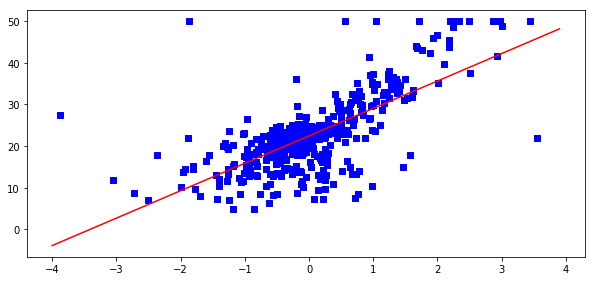

In [7]:
# 6：結果をプロットする------------------------------------------------
%matplotlib inline
 
line_X=np.arange(-4, 4, 0.1) #3から10まで1刻み
line_Y=clf_rm.predict(line_X[:, np.newaxis])
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.scatter(X_rm_train, Y_train, c='b', marker='s')
plt.plot(line_X, line_Y, c='r')
plt.show


「RMだけの平均2乗誤差」と「全部を使用したときの平均二乗誤差」
46.908401014
33.5325793235


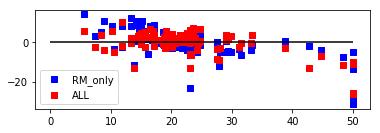

In [8]:
#7：誤差をプロットする-------------------------------------------------
Y_rm_pred=clf_rm.predict(X_rm_test)
plt.subplot(2, 1, 2)
plt.scatter(Y_test, Y_rm_pred-Y_test, c='b', marker='s', label="RM_only")
 
Y_pred=clf.predict(X_test)
plt.scatter(Y_test, Y_pred-Y_test, c='r', marker='s',label="ALL")
plt.legend()
plt.hlines(y=0, xmin=0, xmax=50, colors='black')
plt.show
 
print("\n「RMだけの平均2乗誤差」と「全部を使用したときの平均二乗誤差」")
RMS=np.mean((Y_pred - Y_test) ** 2)
RMS_rm=np.mean((Y_rm_pred - Y_test) ** 2)
print(RMS_rm)
print(RMS)

# Lasso Regressor

L1ノルムによって、係数wがスパースになる

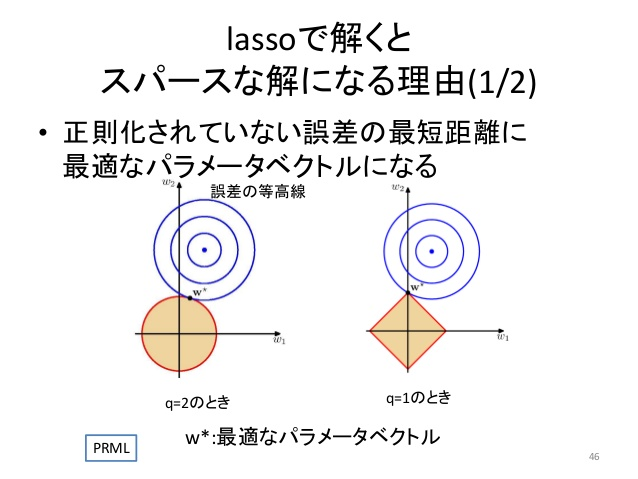

In [9]:
from IPython.display import Image, display_png, display_jpeg
display_jpeg(Image("./images/lasso.jpg"))

右側のL1ノルムの場合、ひし形になるので、w*=1, w1=0のとがった点で、誤差が最小になりやすい

In [10]:
#3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)
 
#4：学習データとテストデータに分割する-------------------------------
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:
 #6：Lasso Regressorを適用する-------------------------------------------
clf_lasso= linear_model.Lasso(alpha=1.0)
clf_lasso.fit(X_train, Y_train)
 
print("\nLassoでの係数")
print(clf_lasso.intercept_) 
print(clf_lasso.coef_) 


Lassoでの係数
22.5754303405
[-0.          0.         -0.          0.         -0.          2.51692604
 -0.         -0.         -0.         -0.1811126  -1.77331473  0.05691698
 -3.57188137]


In [12]:
#7：テストデータでの誤差を比較する-------------------------------------------
Y_pred=clf.predict(X_test)
Y_lasso_pred=clf_lasso.predict(X_test)
print("\n「SGDの平均2乗誤差」と「Lassoの平均2乗誤差」")
RMS=np.mean((Y_pred - Y_test) ** 2)
RMS_lasso=np.mean((Y_lasso_pred - Y_test) ** 2)
print(RMS)
print(RMS_lasso)


「SGDの平均2乗誤差」と「Lassoの平均2乗誤差」
33.5325793235
40.348597575


---

# Ridge Regressor

L2ノルムのペナルティを誤差に加え、wの大きさがだいたい同じようになるようにする。

In [13]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)
 
# 4：学習データとテストデータに分割する-------------------------------
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=0)

In [14]:
# 5：SGD Regressorを適用する-------------------------------------------
clf = linear_model.SGDRegressor(max_iter=1000)
clf.fit(X_train, Y_train)
 
print("SGDでの係数")
print(clf.intercept_) 
print(clf.coef_) 

SGDでの係数
[ 22.48291499]
[-1.02864154  1.04764542  0.0384304   0.60135571 -1.86767485  2.60442144
 -0.08611878 -2.91921557  2.12757262 -1.84328784 -2.26091537  0.74076429
 -3.5229533 ]


In [15]:
#6：Ridge Regressorを適用する-------------------------------------------
clf_ridge= linear_model.Ridge(alpha=1.0)
clf_ridge.fit(X_train, Y_train)
 
print("\nRidgeでの係数")
print(clf_ridge.intercept_) 
print(clf_ridge.coef_) 
 
#7：テストデータでの誤差を比較する-------------------------------------------
Y_pred=clf.predict(X_test)
Y_ridge_pred=clf_ridge.predict(X_test)
print("\n「SGDの平均2乗誤差」と「Ridgeの平均2乗誤差」")
RMS=np.mean((Y_pred - Y_test) ** 2)
RMS_ridge=np.mean((Y_ridge_pred - Y_test) ** 2)
print(RMS)
print(RMS_ridge)


Ridgeでの係数
22.4815111825
[-1.01649357  1.02733437  0.01192747  0.59818575 -1.83082046  2.61307788
 -0.09465198 -2.88262602  2.04774814 -1.78279739 -2.25280667  0.73945729
 -3.50110119]

「SGDの平均2乗誤差」と「Ridgeの平均2乗誤差」
33.4072299604
33.5367972113


---

# ElaticNet Regressor

ElaticNet RegressorはLassoとRidgeの組み合わせ  
L1ノルムのペナルティとL2ノルムのペナルティの両方を与える解析手法

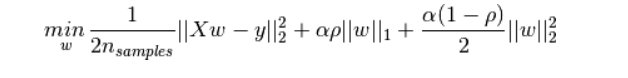

In [16]:
from IPython.display import Image, display_png
display_png(Image("./images/elatic.png"))

In [17]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)
 
# 4：学習データとテストデータに分割する-------------------------------
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
#解説6：Elastic Net Regressorを適用する-------------------------------------------
clf_er= linear_model.ElasticNet(alpha=1.0, l1_ratio=0.5)
clf_er.fit(X_train, Y_train)
 
print("\nElastic Netでの係数")
print(clf_er.intercept_) 
print(clf_er.coef_) 
 
 
#7：テストデータでの誤差を比較する-------------------------------------------
Y_ridge_pred=clf_ridge.predict(X_test)
Y_er_pred=clf_er.predict(X_test)
 
print("\n「Ridgeの平均2乗誤差」と「ElasticNetの平均2乗誤差」")
RMS_ridge=np.mean((Y_ridge_pred - Y_test) ** 2)
RMS_er=np.mean((Y_er_pred - Y_test) ** 2)
print(RMS_ridge)
print(RMS_er)


Elastic Netでの係数
22.5405007821
[-0.40309361  0.19512626 -0.34776665  0.35388271 -0.2235169   2.25878326
 -0.         -0.         -0.         -0.46998832 -1.51434239  0.43646099
 -2.28985838]

「Ridgeの平均2乗誤差」と「ElasticNetの平均2乗誤差」
33.5367972113
42.9227837338


係数を比較すると、ElasticNetではRidgeよりも0となっている係数が多い  
※ただし、Lassoのときよりは少ない

# SVR linear

SVCの場合、マージン最大化といって、識別平面からそれぞれのクラスの最近傍の点への距離が最大となるように識別平面を設定した。  
さらにソフトマージンといってスラック変数を用意し、識別平面できちんと識別できなかった誤識別された点に対してペナルティを与えた。  
SVRの場合は、重みの最小化となり、重み係数wの二乗和（L2ノルム）が最小となるように設定する。  
さらに回帰直線から一定の距離（epsilon）まではペナルティを与えませんが、それ以上離れた点に対してはペナルティを与える。  

In [19]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)
sc.fit(X_rm)
X_rm=sc.transform(X_rm)
 
# 4：学習データとテストデータに分割する-------------------------------
X_rm_train, X_rm_test, Y_train, Y_test = cross_validation.train_test_split(X_rm, Y, test_size=0.5, random_state=0)

In [20]:
# 6：SVR linear Regressorを適用する-------------------------------------------
clf_svr = svm.SVR(kernel='linear', C=1e3, epsilon=2.0)
clf_svr.fit(X_rm_train, Y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=2.0, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

詳しい使い方はこちら  
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR


「SGDの平均2乗誤差」と「SVRの平均二乗誤差」
42.9091788016
44.546081375


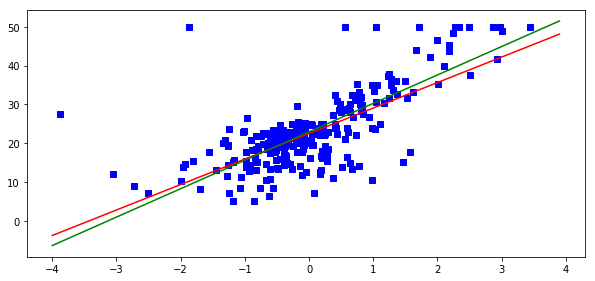

In [21]:
# 7：結果をプロットする------------------------------------------------
%matplotlib inline
 
line_X=np.arange(-4, 4, 0.1) #3から10まで1刻み
line_Y_sgd=clf_rm.predict(line_X[:, np.newaxis])
line_Y_svr=clf_svr.predict(line_X[:, np.newaxis])
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.scatter(X_rm_train, Y_train, c='b', marker='s')
plt.plot(line_X, line_Y_sgd, c='r')
plt.plot(line_X, line_Y_svr, c='g')
plt.show
 
# 8：誤差-------------------------------------------------
Y_pred_sgd=clf_rm.predict(X_rm_test)
Y_pred_svr=clf_svr.predict(X_rm_test)
print("\n「SGDの平均2乗誤差」と「SVRの平均二乗誤差」")
RMS_sgd=np.mean((Y_pred_sgd - Y_test) ** 2)
RMS_svr=np.mean((Y_pred_svr - Y_test) ** 2)
print(RMS_sgd)
print(RMS_svr)

SVR合は回帰直線から距離epsilonまでは誤差を考慮せず、それ以上は絶対値で誤差を考慮する。  
そのため定性的にはSVRの場合、非小さな誤差に対して強い回帰直線説明変数yにのっている小さな誤差に対して強い回帰直線を作ることができる

---